In [49]:
# importing modules and data

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# download and extract data from mnist database
# one hot classifies the data ex : for "1" [1,0,0,0,0,0,0,0,0,0]

mnist = input_data.read_data_sets('/temp/data', one_hot = True)

Extracting /temp/data\train-images-idx3-ubyte.gz
Extracting /temp/data\train-labels-idx1-ubyte.gz
Extracting /temp/data\t10k-images-idx3-ubyte.gz
Extracting /temp/data\t10k-labels-idx1-ubyte.gz


In [44]:
#neural network model

#number of nodes
image_size = 28
batch_size = 100
hidden_1_nodes = 500
total_class = 10
#hyperParam_l2 = 1e-2

#graph = tf.Graph()
#with graph.as_default():
    
#input dataset to the model
tf_train_datasets = tf.placeholder(tf.float32, [None, image_size * image_size])
tf_train_labels = tf.placeholder(tf.float32, [None, total_class])
hyperParam_l2 = tf.placeholder(tf.float32)

#input layer
input_layer_weights = tf.Variable(tf.truncated_normal([image_size * image_size, hidden_1_nodes]))
input_layer_biases = tf.Variable(tf.zeros([hidden_1_nodes]))

input_layer_logit = tf.add(tf.matmul(tf_train_datasets, input_layer_weights), input_layer_biases)
input_layer_logit = tf.nn.relu(input_layer_logit)

#first hidden layer
hidden_1_weights = tf.Variable(tf.truncated_normal([hidden_1_nodes, total_class]))
hidden_1_biases = tf.Variable(tf.zeros([total_class]))

hidden_1_logit = tf.add(tf.matmul(input_layer_logit, hidden_1_weights), hidden_1_biases)

#cost function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = tf_train_labels, logits = hidden_1_logit)) \
         + hyperParam_l2 * (tf.nn.l2_loss(input_layer_weights) + tf.nn.l2_loss(hidden_1_weights))

#optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

#prediciton
correct_pred = tf.equal(tf.argmax(hidden_1_logit, 1), tf.argmax(tf_train_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [40]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs = 15

for epoch in range(epochs):    
    for i in range(int(mnist.train.num_examples/batch_size)):
        batch = mnist.train.next_batch(batch_size)
        sess.run([optimizer], feed_dict = {tf_train_datasets: batch[0], tf_train_labels: batch[1]})
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={tf_train_datasets:batch[0], tf_train_labels: batch[1]})
            print("epoch %d, step %d, training accuracy %g"%(epoch, i, train_accuracy))

print("test accuracy %g"%accuracy.eval(feed_dict={tf_train_datasets: mnist.test.images, tf_train_labels: mnist.test.labels}))
sess.close()

epoch 0, step 0, training accuracy 0.07
epoch 0, step 100, training accuracy 0.7
epoch 0, step 200, training accuracy 0.8
epoch 0, step 300, training accuracy 0.76
epoch 0, step 400, training accuracy 0.85
epoch 0, step 500, training accuracy 0.81
epoch 1, step 0, training accuracy 0.93
epoch 1, step 100, training accuracy 0.91
epoch 1, step 200, training accuracy 0.85
epoch 1, step 300, training accuracy 0.87
epoch 1, step 400, training accuracy 0.84
epoch 1, step 500, training accuracy 0.92
epoch 2, step 0, training accuracy 0.94
epoch 2, step 100, training accuracy 0.9
epoch 2, step 200, training accuracy 0.89
epoch 2, step 300, training accuracy 0.8
epoch 2, step 400, training accuracy 0.9
epoch 2, step 500, training accuracy 0.93
epoch 3, step 0, training accuracy 0.88
epoch 3, step 100, training accuracy 0.94
epoch 3, step 200, training accuracy 0.92
epoch 3, step 300, training accuracy 0.92
epoch 3, step 400, training accuracy 0.9
epoch 3, step 500, training accuracy 0.83
epoch 

In [45]:
l2_reg_values = [pow(10, i) for i in np.arange(-4, -1, 0.1)]
accuracy_values = []

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs = 15

for l2_reg_value in l2_reg_values:
    for i in range(int(mnist.train.num_examples/batch_size)):
        batch = mnist.train.next_batch(batch_size)
        sess.run([optimizer], feed_dict = {tf_train_datasets: batch[0], tf_train_labels: batch[1], hyperParam_l2: l2_reg_value})
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={tf_train_datasets:batch[0], tf_train_labels: batch[1], hyperParam_l2: l2_reg_value})
            print("epoch %d, step %d, training accuracy %g"%(epoch, i, train_accuracy))

    accuracy_values.append(accuracy.eval(feed_dict={tf_train_datasets: mnist.test.images, tf_train_labels: mnist.test.labels, hyperParam_l2: l2_reg_value}))
sess.close()

epoch 14, step 0, training accuracy 0.08
epoch 14, step 100, training accuracy 0.59
epoch 14, step 200, training accuracy 0.79
epoch 14, step 300, training accuracy 0.79
epoch 14, step 400, training accuracy 0.85
epoch 14, step 500, training accuracy 0.87
epoch 14, step 0, training accuracy 0.81
epoch 14, step 100, training accuracy 0.89
epoch 14, step 200, training accuracy 0.89
epoch 14, step 300, training accuracy 0.94
epoch 14, step 400, training accuracy 0.89
epoch 14, step 500, training accuracy 0.89
epoch 14, step 0, training accuracy 0.91
epoch 14, step 100, training accuracy 0.96
epoch 14, step 200, training accuracy 0.98
epoch 14, step 300, training accuracy 0.95
epoch 14, step 400, training accuracy 0.95
epoch 14, step 500, training accuracy 0.91
epoch 14, step 0, training accuracy 0.91
epoch 14, step 100, training accuracy 0.97
epoch 14, step 200, training accuracy 0.9
epoch 14, step 300, training accuracy 0.95
epoch 14, step 400, training accuracy 0.95
epoch 14, step 500, 

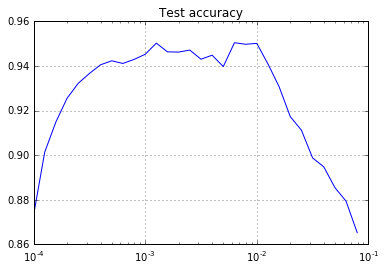

In [50]:
plt.semilogx(l2_reg_values, accuracy_values)
plt.grid(True)
plt.title('Test accuracy')
plt.show()

In [61]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs = 20

for epoch in range(epochs):    
    for i in range(int(mnist.train.num_examples/batch_size)):
        batch = mnist.train.next_batch(batch_size)
        sess.run([optimizer], feed_dict = {tf_train_datasets: batch[0], tf_train_labels: batch[1], hyperParam_l2: 1e-21/10})
        '''if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={tf_train_datasets:batch[0], tf_train_labels: batch[1], hyperParam_l2: 1e-3})
            print("epoch %d, step %d, training accuracy %g"%(epoch, i, train_accuracy))
        '''
print("test accuracy %g"%accuracy.eval(feed_dict={tf_train_datasets: mnist.test.images, tf_train_labels: mnist.test.labels, hyperParam_l2: 1e-3}))
sess.close()

test accuracy 0.9555


In [ ]:
#neural network model

#number of nodes
image_size = 28
batch_size = 100
hidden_1_nodes = 500
total_class = 10
#hyperParam_l2 = 1e-2

#graph = tf.Graph()
#with graph.as_default():
    
#input dataset to the model
tf_train_datasets = tf.placeholder(tf.float32, [None, image_size * image_size])
tf_train_labels = tf.placeholder(tf.float32, [None, total_class])
hyperParam_l2 = tf.placeholder(tf.float32)

#input layer
input_layer_weights = tf.Variable(tf.truncated_normal([image_size * image_size, hidden_1_nodes]))
input_layer_biases = tf.Variable(tf.zeros([hidden_1_nodes]))

input_layer_logit = tf.add(tf.matmul(tf_train_datasets, input_layer_weights), input_layer_biases)
input_layer_logit = tf.nn.relu(input_layer_logit)
input_layer_logit = tf.nn.droupout(input_layer_logit, 0.5)

#first hidden layer
hidden_1_weights = tf.Variable(tf.truncated_normal([hidden_1_nodes, total_class]))
hidden_1_biases = tf.Variable(tf.zeros([total_class]))

hidden_1_logit = tf.add(tf.matmul(input_layer_logit, hidden_1_weights), hidden_1_biases)

#cost function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = tf_train_labels, logits = hidden_1_logit)) \
         + hyperParam_l2 * (tf.nn.l2_loss(input_layer_weights) + tf.nn.l2_loss(hidden_1_weights))

#optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

#prediciton
correct_pred = tf.equal(tf.argmax(hidden_1_logit, 1), tf.argmax(tf_train_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [62]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
epochs = 20

for epoch in range(epochs):    
    for i in range(int(mnist.train.num_examples/batch_size)):
        batch = mnist.train.next_batch(batch_size)
        sess.run([optimizer], feed_dict = {tf_train_datasets: batch[0], tf_train_labels: batch[1], hyperParam_l2: 1e-21/10})
        '''if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={tf_train_datasets:batch[0], tf_train_labels: batch[1], hyperParam_l2: 1e-3})
            print("epoch %d, step %d, training accuracy %g"%(epoch, i, train_accuracy))
        '''
print("test accuracy %g"%accuracy.eval(feed_dict={tf_train_datasets: mnist.test.images, tf_train_labels: mnist.test.labels, hyperParam_l2: 1e-21/10}))
sess.close()

test accuracy 0.9607
